## Importing the data

In [44]:
import time
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

# Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense

# NLTK
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data = pd.read_csv('Data/Document.txt', header = None, error_bad_lines=False)

In [4]:
data

,0
0,You will win if you work hard
1,Be lazy and win the life
2,Life is short
3,Be lazy
4,Life is short don't be lazy
5,Don't be lazy to win
6,Don't be lazy
7,Be happy
8,Don't be happy
9,Work hard


### Tokenizing & Normalize

In [5]:
import numpy as np

arr = np.asarray(data[0])
arr

array(['You will win if you work hard', 'Be lazy and win the life',
       'Life is short', 'Be lazy', "Life is short don't be lazy",
       "Don't be lazy to win", "Don't be lazy", 'Be happy',
       "Don't be happy", 'Work hard', "Don't work hard", 'Suneet is Lazy',
       'Tejas is Lazy', 'Vasu is lazy', 'Varun is lazy',
       'Suneet is not lazy', 'Tejas is not lazy', 'Vasu is not lazy',
       'Varun is not lazy', 'Work as if you were to die tomorrow',
       'Learn as if you were to live forever', 'Suneet is happy',
       'Tejas is happy', 'Vasu is happy', 'Varun is happy',
       'Suneet is not happy', 'Tejas is not happy', 'Vasu is not happy',
       'Varun is not happy', 'Live a lazy life', 'Live a happy life',
       'Success is hard work', 'There is no subsititute for hard work',
       'Fail in life', 'Hard work never fails to bear fruit',
       'Winners embrace hard work',
       'I learned the value of hard work by working hard',
       'Learn from hard work', 'Be afri

In [6]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize 
  
text = str(arr)

for i in range(0, data.shape[0]):
    #only keeping alphabets
    arr_new = re.sub('[^a-zA-Z]', ' ', text)
    
    #only lowercase
    arr_new = arr_new.lower()
    
arr_new

'  you will win if you work hard   be lazy and win the life    life is short   be lazy   life is short don t be lazy    don t be lazy to win   don t be lazy   be happy   don t be happy    work hard   don t work hard   suneet is lazy   tejas is lazy    vasu is lazy   varun is lazy   suneet is not lazy   tejas is not lazy    vasu is not lazy   varun is not lazy    work as if you were to die tomorrow    learn as if you were to live forever   suneet is happy   tejas is happy    vasu is happy   varun is happy   suneet is not happy    tejas is not happy   vasu is not happy   varun is not happy    live a lazy life   live a happy life   success is hard work    there is no subsititute for hard work   fail in life    hard work never fails to bear fruit   winners embrace hard work    i learned the value of hard work by working hard   learn from hard work    be afriad of hard work   life is hard  '

In [7]:
print(word_tokenize(arr_new))
arr_tokenize = word_tokenize(arr_new)

['you', 'will', 'win', 'if', 'you', 'work', 'hard', 'be', 'lazy', 'and', 'win', 'the', 'life', 'life', 'is', 'short', 'be', 'lazy', 'life', 'is', 'short', 'don', 't', 'be', 'lazy', 'don', 't', 'be', 'lazy', 'to', 'win', 'don', 't', 'be', 'lazy', 'be', 'happy', 'don', 't', 'be', 'happy', 'work', 'hard', 'don', 't', 'work', 'hard', 'suneet', 'is', 'lazy', 'tejas', 'is', 'lazy', 'vasu', 'is', 'lazy', 'varun', 'is', 'lazy', 'suneet', 'is', 'not', 'lazy', 'tejas', 'is', 'not', 'lazy', 'vasu', 'is', 'not', 'lazy', 'varun', 'is', 'not', 'lazy', 'work', 'as', 'if', 'you', 'were', 'to', 'die', 'tomorrow', 'learn', 'as', 'if', 'you', 'were', 'to', 'live', 'forever', 'suneet', 'is', 'happy', 'tejas', 'is', 'happy', 'vasu', 'is', 'happy', 'varun', 'is', 'happy', 'suneet', 'is', 'not', 'happy', 'tejas', 'is', 'not', 'happy', 'vasu', 'is', 'not', 'happy', 'varun', 'is', 'not', 'happy', 'live', 'a', 'lazy', 'life', 'live', 'a', 'happy', 'life', 'success', 'is', 'hard', 'work', 'there', 'is', 'no', 's

### Stemming & Cleaning

In [8]:
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Lemmatizing the words
lemmatizer = WordNetLemmatizer() 
   
stop_words = set(stopwords.words('english')) 
final_list = []

for word in arr_tokenize:
    new_arr = [] 
    if word not in stop_words: 
        final_list.append(lemmatizer.lemmatize(word))

In [10]:
final_list

['win',
 'work',
 'hard',
 'lazy',
 'win',
 'life',
 'life',
 'short',
 'lazy',
 'life',
 'short',
 'lazy',
 'lazy',
 'win',
 'lazy',
 'happy',
 'happy',
 'work',
 'hard',
 'work',
 'hard',
 'suneet',
 'lazy',
 'tejas',
 'lazy',
 'vasu',
 'lazy',
 'varun',
 'lazy',
 'suneet',
 'lazy',
 'tejas',
 'lazy',
 'vasu',
 'lazy',
 'varun',
 'lazy',
 'work',
 'die',
 'tomorrow',
 'learn',
 'live',
 'forever',
 'suneet',
 'happy',
 'tejas',
 'happy',
 'vasu',
 'happy',
 'varun',
 'happy',
 'suneet',
 'happy',
 'tejas',
 'happy',
 'vasu',
 'happy',
 'varun',
 'happy',
 'live',
 'lazy',
 'life',
 'live',
 'happy',
 'life',
 'success',
 'hard',
 'work',
 'subsititute',
 'hard',
 'work',
 'fail',
 'life',
 'hard',
 'work',
 'never',
 'fails',
 'bear',
 'fruit',
 'winner',
 'embrace',
 'hard',
 'work',
 'learned',
 'value',
 'hard',
 'work',
 'working',
 'hard',
 'learn',
 'hard',
 'work',
 'afriad',
 'hard',
 'work',
 'life',
 'hard']

In [11]:
# Checking the words and picking the unique ones 

lemm_words = []
for i in final_list:
    if i!=[] and i not in lemm_words:
        # print(i)
        lemm_words.append(i)
        
lemm_words

['win',
 'work',
 'hard',
 'lazy',
 'life',
 'short',
 'happy',
 'suneet',
 'tejas',
 'vasu',
 'varun',
 'die',
 'tomorrow',
 'learn',
 'live',
 'forever',
 'success',
 'subsititute',
 'fail',
 'never',
 'fails',
 'bear',
 'fruit',
 'winner',
 'embrace',
 'learned',
 'value',
 'working',
 'afriad']

In [12]:
# Checking if the lemm_words list is right
for i in lemm_words:
    if i in final_list:
        print(i)

win
work
hard
lazy
life
short
happy
suneet
tejas
vasu
varun
die
tomorrow
learn
live
forever
success
subsititute
fail
never
fails
bear
fruit
winner
embrace
learned
value
working
afriad


### Making the dataframe of appropriate features

In [13]:
df = pd.DataFrame(data = [[0]*len(lemm_words)]*40, columns=lemm_words)

In [14]:
df

,win,work,hard,lazy,life,short,happy,suneet,tejas,vasu,...,never,fails,bear,fruit,winner,embrace,learned,value,working,afriad
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
count = 0
for i in arr:
    for j in lemm_words:
        if j in i:
            index = lemm_words.index(j)
            df.iloc[count:count+1, index:index+1] += 1
    count+=1

In [16]:
df

,win,work,hard,lazy,life,short,happy,suneet,tejas,vasu,...,never,fails,bear,fruit,winner,embrace,learned,value,working,afriad
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### X and Y

In [17]:
X = np.array(df)

# 0 = Demotivational
# 1 = Motivational
y = pd.read_csv('Data/Document_target.txt', header = None, error_bad_lines=False)
y = np.array(y)

In [18]:
X

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [19]:
y

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]], dtype=int64)

In [20]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(40, 29)
y: Type-<class 'numpy.ndarray'>, Shape-(40, 1)


**Splitting**

In [21]:
# Do train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
# To check if the data is correctly segregated
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (30, 29) , y_train: (30, 1)
X_test: (10, 29) , y_test: (10, 1)


### Model

In [29]:
# Initializing the model
# 2 layers model, 1 hidden, 1 output
model = keras.Sequential(
    [
        layers.Dense(32, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ]
)

**Testing**

In [24]:
'''Optional to RUN!!'''
# Call the model on a test input
x_ = tf.ones((1, 4))
y_ = model(x_)
print("Number of weights after calling the model:", len(model.weights)) 

Number of weights after calling the model: 4


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (1, 32)                   160       
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=None)

**Evaluation**

In [32]:
# evaluate the keras model

_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 1000us/step - loss: 0.5535 - accuracy: 0.7000
Accuracy: 70.00


### General model for multiple node types, shapes

In [69]:
def keras_model(nodes, X_train, y_train):
    model = keras.Sequential()
    
    print(f"\n\n\n------------------------------------{nodes} nodes------------------------------------\n\n\n")
    # Adding layers
    model.add(Dense(nodes, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Calculating the time for training the model
    start = time.time()
    model.fit(X_train, y_train, epochs=500,verbose = None,batch_size=10)
    
    # Sleeping for 1 sec to get 10 sec runtime
    time.sleep(1)

    # End time
    end = time.time()
    
    # Accuracies
    _, train_acc = model.evaluate(X_train, y_train)
    _, test_acc = model.evaluate(X_test,y_test)

    # Calculating the total time
    total = end-start
    return train_acc, test_acc, total

In [70]:
# For automatic training
all_train = []
all_test = []
all_time = []

nodes = [8, 16, 32,64, 128, 256, 512, 1028]
for i in nodes:
    train_acc, test_acc, total = keras_model(i, X_train, y_train)
    all_train.append(train_acc)
    all_test.append(test_acc)
    all_time.append(total)




------------------------------------8 nodes------------------------------------



1/1 [==============================] - 0s 0s/step - loss: 1.1392 - accuracy: 0.3000



------------------------------------16 nodes------------------------------------



1/1 [==============================] - 0s 0s/step - loss: 1.1476 - accuracy: 0.3000



------------------------------------32 nodes------------------------------------



1/1 [==============================] - 0s 998us/step - loss: 1.2896 - accuracy: 0.3000



------------------------------------64 nodes------------------------------------



1/1 [==============================] - 0s 997us/step - loss: 1.5707 - accuracy: 0.3000



------------------------------------128 nodes------------------------------------



1/1 [==============================] - 0s 996us/step - loss: 1.6695 - accuracy: 0.3000



------------------------------------256 nodes------------------------------------



1/1 [==============================] - 0s 998us/

**Plotting/Analysis**

In [76]:
print(all_test)
print(all_train)
print(all_time)

[0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.5, 0.30000001192092896]
[0.7666666507720947, 0.7666666507720947, 0.7666666507720947, 0.7666666507720947, 0.7666666507720947, 0.7666666507720947, 0.7666666507720947, 0.7666666507720947]
[2.537562131881714, 2.259650468826294, 2.283364772796631, 2.3085076808929443, 2.259976863861084, 2.302468776702881, 2.32356595993042, 2.3788957595825195]


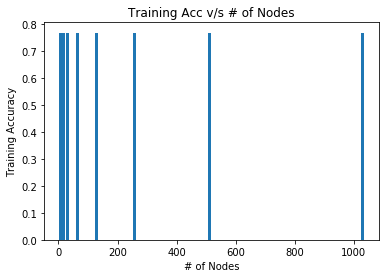

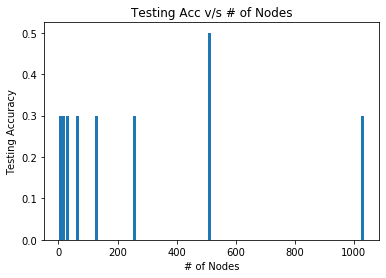

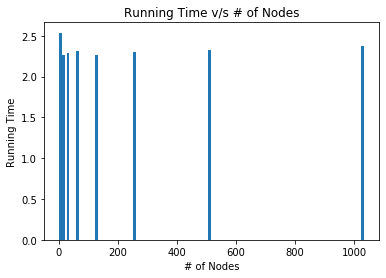

In [82]:
# Creating the bar plots
# Train graph
plt.bar(nodes, all_train, width = 10) 

plt.xlabel("# of Nodes") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s # of Nodes") 
plt.show() 

# Test graph
plt.bar(nodes, all_test, width = 10 ) 
  
plt.xlabel("# of Nodes") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s # of Nodes") 
plt.show() 

# Time graph
plt.bar(nodes, all_time, width = 10 ) 
  
plt.xlabel("# of Nodes") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s # of Nodes") 
plt.show() 

### Extra layered model

In [66]:
def multi_layer_keras_model(layers, nodes, X_train, y_train):
    model = keras.Sequential()
    
    # Adding layers
    # 2 layers
    if(layers==2):
        print("\n\n\n------------------------------------2 Layered------------------------------------\n\n\n")
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    
    # 3 layers
    if(layers==3):
        print("\n\n\n------------------------------------3 Layered------------------------------------\n\n\n")
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    
    # 4 layers
    if(layers==4):
        print("\n\n\n------------------------------------4 Layered------------------------------------\n\n\n")
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    
    # 5 layers
    if(layers==5):
        print("\n\n\n------------------------------------5 Layered------------------------------------\n\n\n")
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Calculating the time for training the model
    start = time.time()
    model.fit(X_train, y_train, epochs=500,verbose = None,batch_size=10)
    
    # Sleeping for 1 sec to get 10 sec runtime
    time.sleep(1)

    # End time
    end = time.time()
    
    # Accuracies
    _, train_acc = model.evaluate(X_train, y_train)
    _, test_acc = model.evaluate(X_test,y_test)

    # Calculating the total time
    total = end-start
    return train_acc, test_acc, total

In [67]:
# For automatic training
all_train_multi = []
all_test_multi = []
all_time_multi = []

for i in range(2, 6):
    train_acc, test_acc, total = multi_layer_keras_model(i, 32, X_train, y_train)
    all_train_multi.append(train_acc)
    all_test_multi.append(test_acc)
    all_time_multi.append(total)




------------------------------------2 Layered------------------------------------



1/1 [==============================] - 0s 2ms/step - loss: 1.4270 - accuracy: 0.3000



------------------------------------3 Layered------------------------------------



1/1 [==============================] - 0s 2ms/step - loss: 1.7419 - accuracy: 0.3000



------------------------------------4 Layered------------------------------------



1/1 [==============================] - 0s 997us/step - loss: 1.9901 - accuracy: 0.5000



------------------------------------5 Layered------------------------------------



1/1 [==============================] - 0s 997us/step - loss: 1.6543 - accuracy: 0.6000


In [75]:
print(all_test_multi)
print(all_train_multi)
print(all_time_multi)

[0.30000001192092896, 0.30000001192092896, 0.5, 0.6000000238418579]
[0.7666666507720947, 0.7666666507720947, 0.7666666507720947, 0.7666666507720947]
[2.286250114440918, 2.3349061012268066, 2.441603899002075, 2.4675238132476807]


**Plotting**

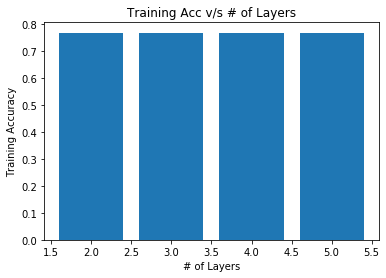

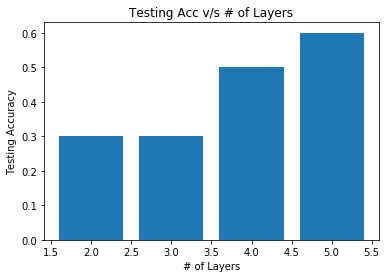

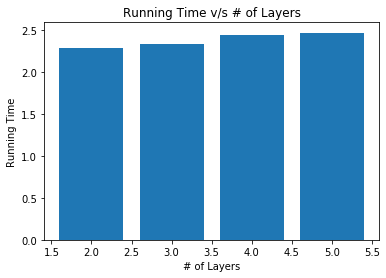

In [81]:
# Creating the bar plots
# Train graph
layers = [2, 3, 4, 5]
plt.bar(layers, all_train_multi) 

plt.xlabel("# of Layers") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s # of Layers") 
plt.show() 

# Test graph
plt.bar(layers, all_test_multi) 
  
plt.xlabel("# of Layers") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s # of Layers") 
plt.show() 

# Time graph
plt.bar(layers, all_time_multi) 
  
plt.xlabel("# of Layers") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s # of Layers") 
plt.show() 

### Conclusion


As the network become more **convoluted** (in this case, simple adding more layers):
    1. We are getting better test accuracy as is evident from the graphs shown above with {2,3,4,5} layers respectively.
    2. Changing the number of nodes in a layer (for the 2 layered network - 1 hidden and 1 output) gets us a gradual 
    increase then an equivalent drop in the testing accuracies.
    3. Mostly the training accuracies were constant compared to their testing accuracies in every case.
    4. The time difference in the models made above is quite negligible (not much difference).
    5. Lammetizing is way bettter than simple Stemming :)